In [222]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

In [258]:
Xk = np.array([0, 0.1, 0.3, 0.4, 0.54, 0.6, 0.8, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
#Xk = np.linspace(0,1,10)
Mi = len(Xk)                     # Number of nodes
T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
H = Xk[1:]-Xk[:-1]               # Element sizes
Mk = Mi-1                        # Number of elements

In [259]:
print("\nNodes: ",Xk,"\n\nNumber of nodes: Mi = ", Mi)
print("\nCollection of elements ('triangulation'):\n\n T = \n\n",T,"\n\nNumber of elements: Mk = ", Mk,"\n\nElement sizes: H = ",H)


Nodes:  [0.   0.1  0.3  0.4  0.54 0.6  0.8  0.95 0.97 1.  ] 

Number of nodes: Mi =  10

Collection of elements ('triangulation'):

 T = 

 [[0.   0.1 ]
 [0.1  0.3 ]
 [0.3  0.4 ]
 [0.4  0.54]
 [0.54 0.6 ]
 [0.6  0.8 ]
 [0.8  0.95]
 [0.95 0.97]
 [0.97 1.  ]] 

Number of elements: Mk =  9 

Element sizes: H =  [0.1  0.2  0.1  0.14 0.06 0.2  0.15 0.02 0.03]


In [263]:
def func(x, consts):
    alpha, b, c = consts
    return 2 * alpha + b * (1 - 2*x) + c * (x - x**2)

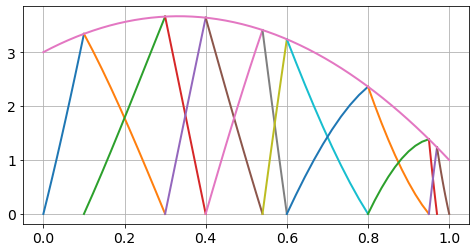

In [277]:
A = np.zeros((Mi,Mi))
f = np.zeros((Mi))
alpha,b,c = 1,1,6
consts = [alpha, b, c]
for k in range(1,Mk):
    hi = H[k-1]
    hip1 = H[k]
    A[k, k-1] = c * hi / 6 + b / 2 - alpha / hi
    A[k, k] = c * (hi + hip1) / 3 + alpha * (1/hi + 1/hip1)
    A[k, k+1] = c * hip1 / 6 + b / 2 - alpha / hip1

    #f1 = lambda x: func(x, consts) * (x - Xk[k-1]) / hi
    #f2 = lambda x: func(x, consts) * (Xk[k+1] - x) / hip1
 
    def f1(x):
        return func(x, consts) * (x - Xk[k-1]) / hi
    
    def f2(x):
        return func(x, consts) * (Xk[k+1] - x) / hip1
    xtest = np.linspace(Xk[k-1], Xk[k], 10)
    plt.plot(xtest, f1(xtest))
    xtest = np.linspace(Xk[k], Xk[k+1], 10)
    plt.plot(xtest, f2(xtest))

    f[k] = (integrate.quad(f1, Xk[k-1], Xk[k])[0] + integrate.quad(f2, Xk[k], Xk[k+1])[0])
    """for alpha in range(2):
        i = loc2glob(k,alpha)
        for beta in range(2):
            j = loc2glob(k,beta)
            A[i,j] += Ak[alpha,beta]/H[k]
        f[i] += fk[alpha]*H[k]"""
    
xtest = np.linspace(0,1,50)
plt.plot(xtest, func(xtest, consts))

In [278]:
# Impose boundary condition
# Dirichlet boundary conditions
A[0,:] = 0;
A[0,0] = 1
f[0] = 0
A[-1,:] = 0
A[-1,-1] = 1
f[-1] = 0
print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=3, out=None))

A=
 [[  1.    0.    0.    0.    0.    0.    0.    0.    0.    0. ]
 [ -9.4  15.6  -4.3   0.    0.    0.    0.    0.    0.    0. ]
 [  0.   -4.3  15.6  -9.4   0.    0.    0.    0.    0.    0. ]
 [  0.    0.   -9.4  17.6  -6.5   0.    0.    0.    0.    0. ]
 [  0.    0.    0.   -6.5  24.2 -16.1   0.    0.    0.    0. ]
 [  0.    0.    0.    0.  -16.1  22.2  -4.3   0.    0.    0. ]
 [  0.    0.    0.    0.    0.   -4.3  12.4  -6.    0.    0. ]
 [  0.    0.    0.    0.    0.    0.   -6.   57.  -49.5   0. ]
 [  0.    0.    0.    0.    0.    0.    0.  -49.5  83.4 -32.8]
 [  0.    0.    0.    0.    0.    0.    0.    0.    0.    1. ]] 

 f= [0.    0.51  0.543 0.434 0.346 0.398 0.424 0.143 0.03  0.   ]


In [279]:
U = np.linalg.solve(A,f)

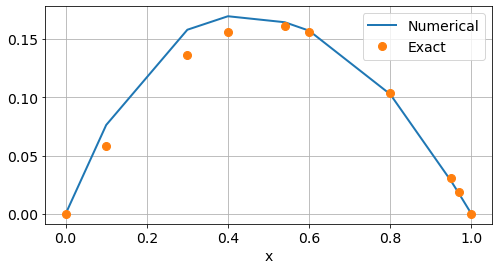

In [286]:
plt.plot(Xk, U, Xk, Xk * (1-Xk), 'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');